<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/6_wine_0811_batchnorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')

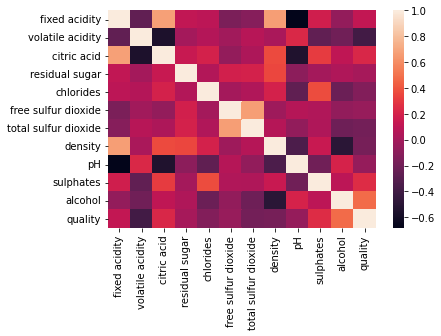

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = red_wine.corr()
sns.heatmap(corr, xticklabels = corr.columns.values,
           yticklabels=corr.columns.values)

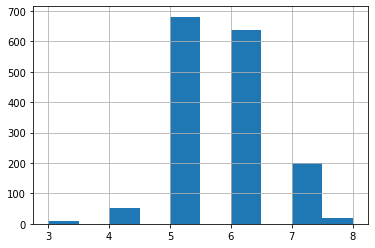

In [3]:
red_wine['quality'].hist()

In [4]:
from sklearn.model_selection import train_test_split

X = red_wine.iloc[:,0:11]
y = red_wine['quality']
  

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.33,
                                                  random_state = 42)

In [5]:
# Scale to [0, 1]
# max_ = df_train.max(axis=0)
# min_ = df_train.min(axis=0)
# df_train = (df_train - min_) / (max_ - min_)
# df_valid = (df_valid - min_) / (max_ - min_)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [8]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [9]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.Dense(164, activation='relu', input_shape=[11]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

In [11]:
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=20, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )

In [12]:
model.compile(
    optimizer='adam',
    loss='mae', metrics=['mse']
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    batch_size=256,
    # callbacks=[early_stopping],
    epochs=30,
)

Epoch 1/30
5/5 [==============================] - 2s 189ms/step - loss: 5.5624 - mse: 31.5895 - val_loss: 5.4691 - val_mse: 30.5611
Epoch 2/30
5/5 [==============================] - 0s 17ms/step - loss: 5.3489 - mse: 29.2515 - val_loss: 5.2198 - val_mse: 27.8853
Epoch 3/30
5/5 [==============================] - 0s 17ms/step - loss: 5.0763 - mse: 26.4073 - val_loss: 4.8970 - val_mse: 24.6117
Epoch 4/30
5/5 [==============================] - 0s 19ms/step - loss: 4.7143 - mse: 22.8648 - val_loss: 4.4521 - val_mse: 20.4477
Epoch 5/30
5/5 [==============================] - 0s 20ms/step - loss: 4.2083 - mse: 18.3714 - val_loss: 3.8204 - val_mse: 15.2292
Epoch 6/30
5/5 [==============================] - 0s 22ms/step - loss: 3.4854 - mse: 12.8744 - val_loss: 2.9125 - val_mse: 9.1529
Epoch 7/30
5/5 [==============================] - 0s 16ms/step - loss: 2.4529 - mse: 6.7962 - val_loss: 1.6442 - val_mse: 3.3597
Epoch 8/30
5/5 [==============================] - 0s 18ms/step - loss: 1.1690 - mse: 

# 2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 164)               1968      
                                                                 
 dense_1 (Dense)             (None, 64)                10560     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,641
Trainable params: 14,641
Non-trainable params: 0
_________________________________________________________________


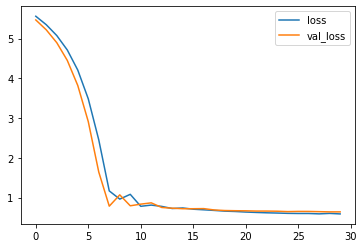

In [15]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:,['loss','val_loss']].plot()

In [16]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)

print(mse_value)

0.6419965624809265


In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred[0]

array([4.8078785], dtype=float32)

In [19]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
813     4
377     7
898     7
126     5
819     5
Name: quality, Length: 528, dtype: int64

In [20]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

-0.027218863727579867